# Tiny study of births per month

In [1]:
%matplotlib inline
import requests
import lxml.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
url = 'http://www.gks.ru/bgd/regl/B09_16/IssWWW.exe/Stg/02-04.htm'

# read page
page= lxml.html.parse(url)

In [2]:
# get table
table = page.getroot().body.xpath('table')[0]

# cleanup
births_month = []
for elem in table:
    births_month.append(elem.text_content().split('\r\n'))

# scplit to data and index lists
# years will be index
years = births_month[0]
births_month = births_month[3:-1]
years = years[1::2]
years[0] = 'Month'
# populate data array
data = []
for elem in births_month:
    line = elem[1::2]
    month = [line[0].split('/')[1].strip()]
    numbers = [int(e) for e in line[1:]]
    data.append(month + numbers)
# construct DataFrame
df = pd.DataFrame(data=data, columns = years)
df = df.set_index('Month')
df


,1990,1995,2000,2005,2006,2007,2008
Month,,,,,,,
January,179784,123380,111541,129722,126022,132915,146279
February,161184,109511,100151,113672,111414,115467,131330
March,175827,122623,109119,126911,125085,129787,136420
April,168284,116552,103332,118745,117737,122930,135064
May,175922,120686,108432,121149,120913,131993,135771
June,174354,116894,109807,124022,128895,132837,142321
July,174833,118792,111541,130757,132073,146093,158288
August,167628,116221,109563,127219,134166,147031,154247
September,153968,108297,104566,122036,127333,140116,150027


In [3]:
# Percentage calculation
df_perc = df.apply(func=lambda x: 100*x/float(x.sum()))
df_perc

,1990,1995,2000,2005,2006,2007,2008
Month,,,,,,,
January,9.039728,9.047524,8.805018,8.901127,8.517158,8.255031,8.534673
February,8.104500,8.030503,7.905894,7.799825,7.529881,7.171378,7.662471
March,8.840765,8.992013,8.613826,8.708245,8.453831,8.060759,7.959448
April,8.461496,8.546823,8.157002,8.147919,7.957219,7.634887,7.880332
May,8.845542,8.849972,8.559594,8.312874,8.171868,8.197768,7.921582
June,8.766701,8.571902,8.668137,8.510011,8.711329,8.250187,8.303743
July,8.790786,8.711083,8.805018,8.972146,8.926113,9.073485,9.235340
August,8.428511,8.522551,8.648875,8.729379,9.067568,9.131742,8.999567
September,7.741672,7.941479,8.254413,8.373737,8.605762,8.702268,8.753350


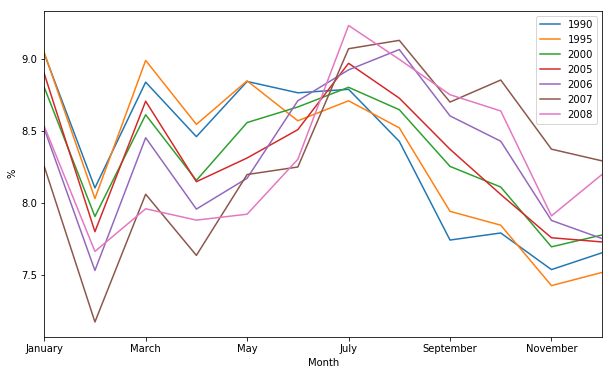

In [4]:
# Draw percentage
p = df_perc.plot(figsize=(10,6))
p.set_ylabel('%')
